# FuseTS - Whittaker Smoothing

The goal of this notebook is to show you how to smooth a timeseries using Whittaker smoothing using FuseTS. The Whittaker smoother represents a discrete penalized least squares algorithm that fits a smooth series z to the original y by pondering two conflicting conditions: (1) the fidelity or deviation from the original data series y and (2) the roughness of the of the smooth curve z (Eilers, 2003). The measure of roughness of z can be expressed as the squared sums of the differences R. On the other hand, deviation from the original data is calculated as the sum of squares of differences. The two terms can be combined in the sum Q = S +λR, being the aim of penalized least squares to find the series z to minimize Q, where λ is a parameter defined by the user. A higher λ value implies a higher influence of R in Q, meaning that z will be smoother at the cost of the fit to the data getting worse. A more detailed description of the algorithm can be found in the original work of Eilers (2003).

Whittaker smoother represents a computationally efficient reconstruction method for smoothing and gap-filling of time series which is why it is used here.

Eilers, P. H., 2003: A perfect smoother. Analytical chemistry, 75 (14), 3631–3636.


**Prerequisites**
* In this notebook we are using openEO to fetch the time series data for the meadow. You can register for a free trial account on the [openEO Platform](https://openeo.cloud/#plans) website.
* This notebook makes use of a variety of plotting libraries whose versions need to correspond. Please download [environment_whittaker.yml](https://github.com/Open-EO/FuseTS/blob/main/environment_whittaker.yml) from this github repository and activate it to run this notebook.

## Study area
In this notebook, we will be looking at an area in Malawi. Malawi was chosen because it is an area of interest of our partner FAO, but also because Malawi is characterized by a lot of clouds, hence a lot of no data values. Therefore, in order to end up with repleted timeseries, gap filling is of great importance in this region.

# Implementation

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
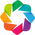

In [1]:
import xarray
import io
import requests
import os
import sys

# Add local version of FuseTS
module_path = os.path.abspath(os.path.join('../../src'))
if module_path not in sys.path:
    sys.path.append(module_path)

    
from fusets.whittaker import whittaker_f, whittaker

import geoviews as gv
import holoviews as hv
import numpy as np
import panel as pn

from holoviews import opts, streams
from holoviews.element.tiles import OSM

import cartopy.crs as ccrs
import pyproj
import matplotlib.pyplot as plt

import openeo

gv.extension("bokeh","matplotlib")
%matplotlib inline

## Loading in data
First, we will load in a Sentinel-2 datase, using openEO, with the three bands we will be using for creating our index: B02, B03 and B04 for the study area in Malawi. We will then calculate our index of choice, which is the VARIgreen (Visible Atmospherically Resistant Index), which is used to emphasize vegetation in the visible portion of the spectrum while mitigating illumination differences and atmospheric effects (Gitelson et al., 2002).

<i> Gitelson, A., et al. 2002: Vegetation and Soil Lines in Visible Spectral Space: A Concept and Technique for Remote Estimation of Vegetation Fraction. International Journal of Remote Sensing 23: 2537−2562.</i>

More information on the usage of openEO's Python client can be found on [GitHub](https://github.com/Open-EO/openeo-python-client).

The first step is to connect to an openEO compatible backend.

In [2]:
connection = openeo.connect("openeo.vito.be").authenticate_oidc()

Authenticated using refresh token.


Next we define the area of interest, in this case an extent, for which we would like to fetch time series data.

In [3]:
minx, miny, maxx, maxy = (33.815134062659126, -12.768309359509516, 33.82955646402499, -12.756356482424422)
spat_ext = dict(west=minx, east=maxx, north=maxy, south=miny, crs=4326)
temp_ext = ["2020-01-01", "2020-12-31"]

We will create an openEO process to calculate the NDVI time series for our area of interest. We'll begin by using the SENTINEL2_L2A_SENTINELHUB collection, and apply a cloud masking algorithm to remove any interfering clouds before calculating the NDVI values.

In [4]:
s2 = connection.load_collection('SENTINEL2_L2A_SENTINELHUB',
                                spatial_extent=spat_ext,
                                temporal_extent=temp_ext,
                                bands=["B02", "B03", "B04","SCL"])
s2 = s2.process("mask_scl_dilation", data=s2, scl_band_name="SCL")

B02 = s2.band('B02')
B03 = s2.band('B03')
B04 = s2.band('B04')

vari_green = (B03 - B04) / (B03 + B04 - B02)                                  

Now that we have calculated the NDVI time series for our area of interest, we can request openEO to download the result to our local storage. This will allow us to access the file and use it for further analysis in this notebook. However, if we have already downloaded the file, we can use the existing time series to continue our analysis without the need for a new download.

In [5]:
if not os.path.exists('./s2_vari_green.nc'):
    job = vari_green.execute_batch("s2_vari_green.nc", title=f'FuseTS - Whittaker - Time Series Data', out_format="netCDF")

vari_green_ts = xarray.load_dataset('./s2_vari_green.nc')['var']

## Smooth the timeseries
We can then apply the Whittaker smoothing from the FuseTS library.

In [6]:
smoothed_output = whittaker(vari_green_ts)

/Users/bramjanssen/projects/vito/FuseTS/venv/lib/python3.8/site-packages/fusets/whittaker.py:112: UserWarning: rename 't' to 't' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  result = result.rename({output_time_dimension: time_dimension})


We can see the results of the original timeseries vs. the smoothed timeseries by plotting t=0 of both of them (or any other t, for that matter)

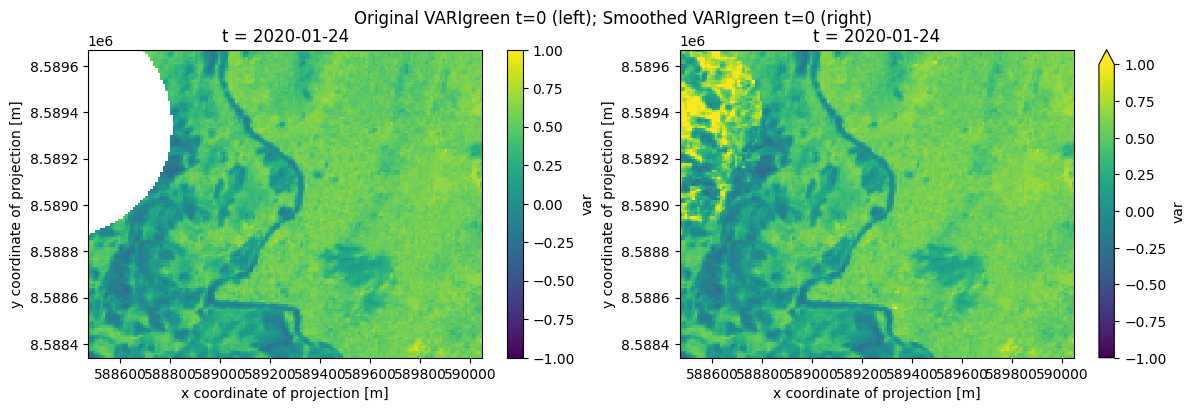

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,4))
fig.suptitle('Original VARIgreen t=0 (left); Smoothed VARIgreen t=0 (right)')
vari_green_ts.isel(t=0).plot(vmin=-1, vmax=1, ax=ax1)
smoothed_output.isel(t=0).plot(vmin=-1, vmax=1, ax=ax2)
plt.show()

We can easily visualize all t-steps with a slider using holoviews, first for the original timeseries...

In [ ]:
kdims = list(smoothed_output.dims)
vdims = ["vari_green_ts"]

hv.Dimension.type_formatters[np.datetime64] = '%Y-%m-%d' # gets rid of the time dimension in the slider
gv_raw = gv.Dataset(vari_green_ts, kdims=kdims, vdims=vdims, crs=ccrs.epsg("32736")).redim(x="lon", y="lat")

dmap = gv_raw.to(gv.Image, ["lon", "lat"], "vari_green_ts", group="raw_data", label="raw", datatype=["xarray"], dynamic=True)
overlay = OSM() * dmap
overlay.opts(
    opts.Image(cmap="RdYlGn", colorbar=True, clim=(-0.8, 0.8), tools=["hover"]),
    opts.Tiles(height=300, width=500))

overlay

...and then also for the smoothed timeseries

In [ ]:
lon = hv.Dimension("lon", label="longitude", unit="deg Northing")
lat = hv.Dimension("lat", label="latitude", unit="deg Easting")

gv_smoothed = gv.Dataset(smoothed_output, kdims=kdims, vdims=vdims, crs=ccrs.epsg("32736")).redim(x=lon, y=lat)
dmap = gv_smoothed.to(gv.Image, ["lon", "lat"], "vari_green_ts", group="raw_data", label="raw", datatype=["xarray"], dynamic=True)

img = dmap.redim(x=lon, y=lat)
overlay = OSM() * img
overlay.opts(
    opts.Image(cmap="RdYlGn", colorbar=True, clim=(-.8, .8), alpha=0.8, tools=["hover"]),
    opts.Tiles(height=300, width=500))

Finally, we can plot both the original and the smoothed timeseries in a visual as well as in a temporal plot, so that we can click on different pixels and see what the smoothing has done to the `vari_green_ts` values on that specific area.

In [ ]:
dim_t = hv.Dimension("t", label="time")
dim_index = hv.Dimension("norm vari_green_ts", label="norm vari_green_ts")

def get_raw_output(x, y):
    x2 = (abs(x) // 10)*10 + 5
    y2 = (abs(y) // 10)*10 + 5
    return hv.Curve(vari_green_ts.sel(x=x2,y=y2), dim_t, dim_index, label="Raw timeseries")

def get_smoothed_output(x, y):
    x2 = (abs(x) // 10)*10 + 5
    y2 = (abs(y) // 10)*10 + 5
    return hv.Curve(smoothed_output.sel(x=x2, y=y2), dim_t, dim_index, label="Whittaker smoothed")

clicker = streams.Tap(source=img, x=smoothed_output["x"].values[0], y=smoothed_output["y"].values[0]) ## Deze x en y zijn de initial values, die wel werken
raw_timeseries = hv.DynamicMap(callback=get_raw_output, streams=[clicker])
smoothed_timeseries = hv.DynamicMap(callback=get_smoothed_output, streams=[clicker])

layout = overlay + raw_timeseries * smoothed_timeseries
layout.opts(
    opts.Image(cmap="RdYlGn", colorbar=True, clim=(-.8, .8), tools=["hover"], alpha=0.8),
    opts.Tiles(height=300, width=500),
    opts.Curve(height=300, width=300, ylim=(-.6, .8)))